In [1]:
# install the required library
!pip install openbb==2.5.1
!pip install pandas==1.5.3
!pip install quantstats==0.0.62

In [2]:
import os
import pandas
from openbb_terminal.sdk import openbb
import quantstats as qs 
import warnings

warnings.filterwarnings("ignore")

In [3]:
# settings to locate excel path
dirname = os.path.dirname
__file__ = os.path.abspath('')

# locate and define excel path
excel_file_path = os.path.join(dirname(dirname(__file__)),"input/portfolio_data.xlsx") # change to your input excel path
benchmark_symbol = "0820EA.KL" # change the benchmark you want, for example SPY

In [4]:
# Load portfolio data from ".xlsx" excel file 
# introductory of openbb: https://algotrading101.com/learn/openbb-guide/
p = openbb.portfolio.load(transactions_file_path = excel_file_path)
p.set_benchmark(benchmark_symbol) # set benchmark

## calculate daily return of your portfolio
daily_returns = openbb.portfolio.dret(portfolio_engine=p) 
## change the date string to datetime format
daily_returns.index = pandas.to_datetime(daily_returns.index) 
## change the column name from "benchmark" to the benchmark symbol you set
daily_returns.rename(columns={"benchmark":benchmark_symbol}, inplace=True) 

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-09-24   2018-09-24
End Period                 2023-12-08   2023-12-08
Risk-Free Rate             0.0%         0.0%
Time in Market             44.0%        100.0%

Cumulative Return          -9.27%       111.47%
CAGR﹪                     -1.28%       10.44%

Sharpe                     -0.02        0.56
Prob. Sharpe Ratio         48.02%       89.82%
Smart Sharpe               -0.02        0.5
Sortino                    -0.03        0.77
Smart Sortino              -0.03        0.69
Sortino/√2                 -0.02        0.54
Smart Sortino/√2           -0.02        0.49
Omega                      1.12         1.12

Max Drawdown               -27.02%      -56.04%
Longest DD Days            1762         1192
Volatility (ann.)          17.04%       38.43%
R^2                        0.0          0.0
Information Ratio          0.03         0.03
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-10-02,2018-12-24,2020-02-13,500,-56.038443,-54.474808
2,2020-02-20,2020-03-16,2020-05-08,79,-37.554033,-35.512765
3,2020-09-03,2022-12-28,2023-12-08,1192,-35.206935,-33.415294
4,2020-06-11,2020-06-11,2020-06-19,9,-6.090703,-4.636082
5,2020-05-26,2020-05-28,2020-06-08,14,-5.974244,-5.550486


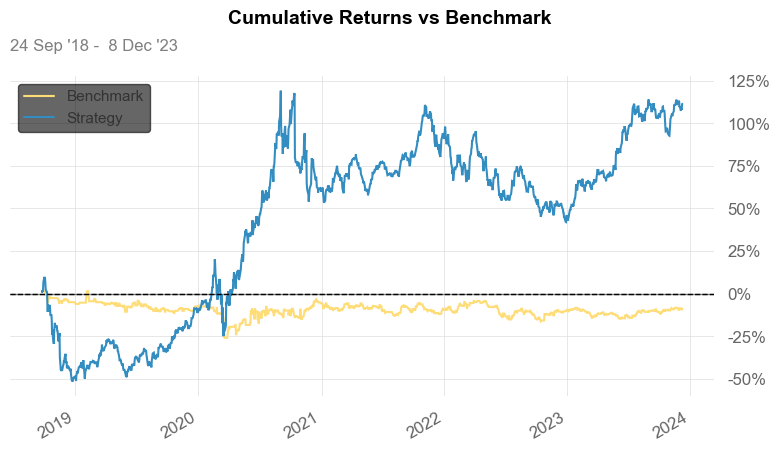

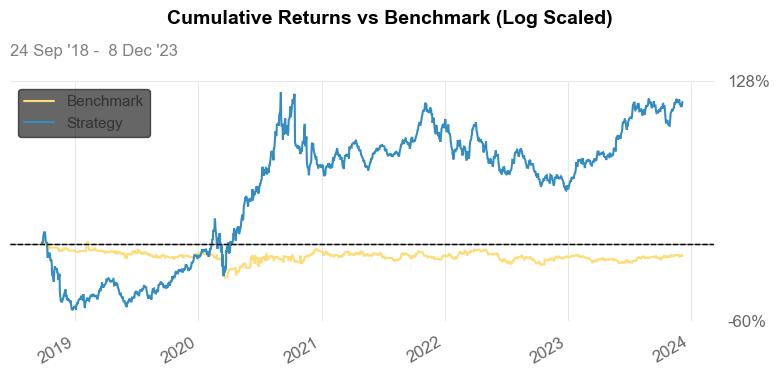

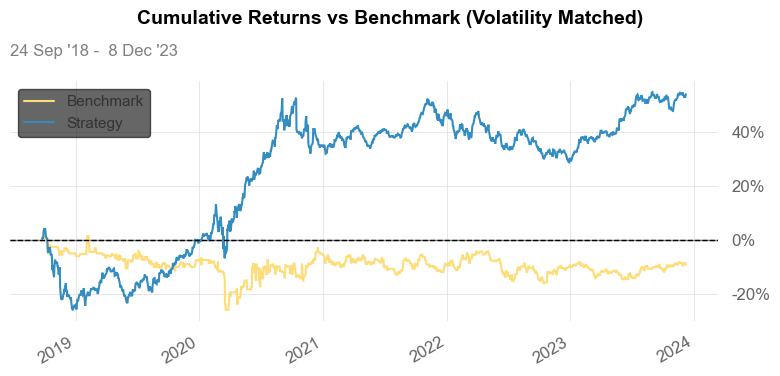

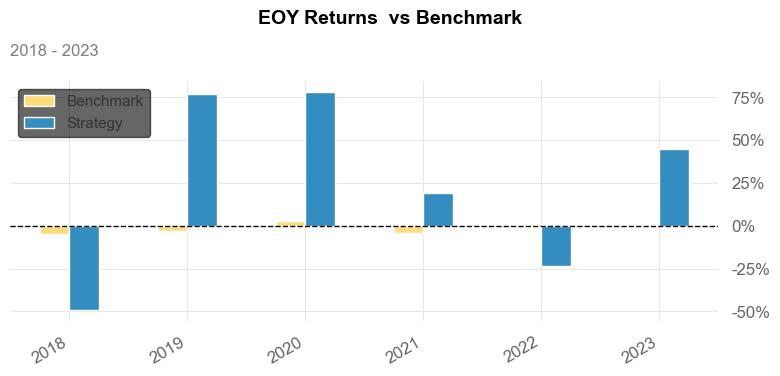

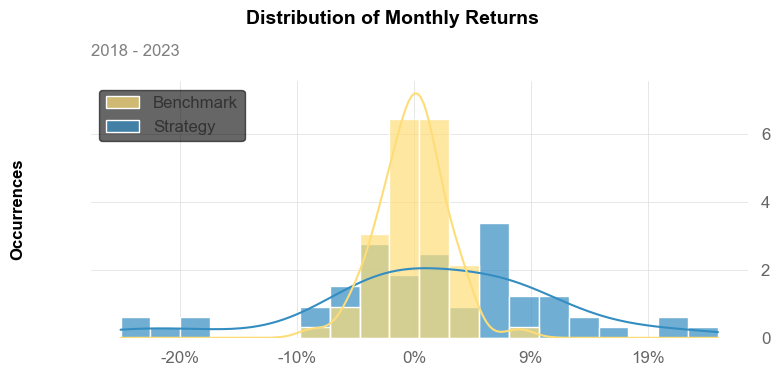

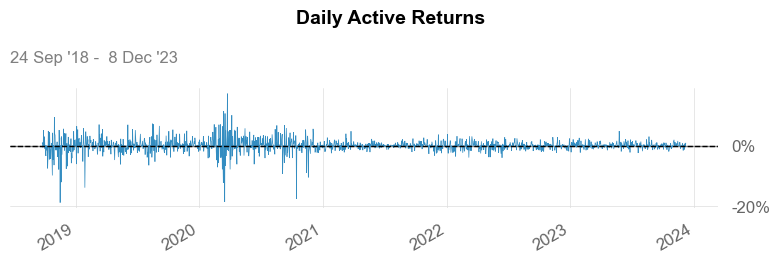

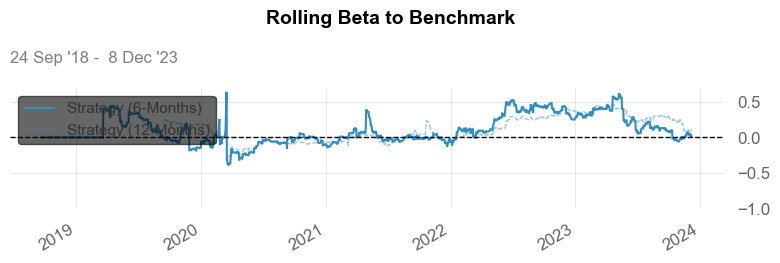

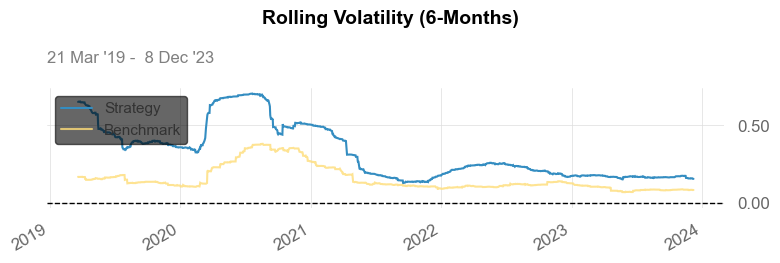

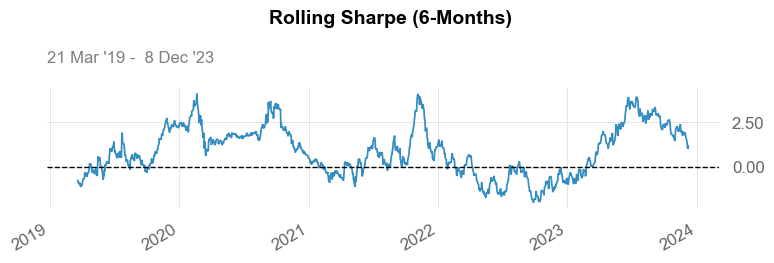

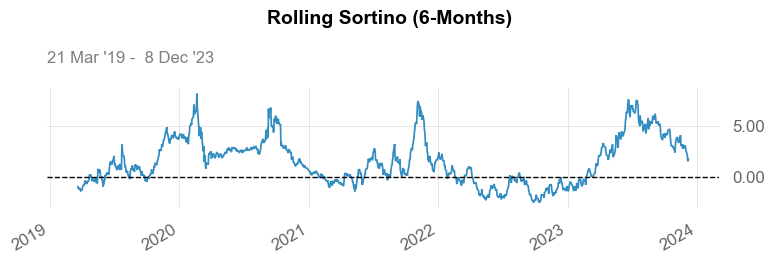

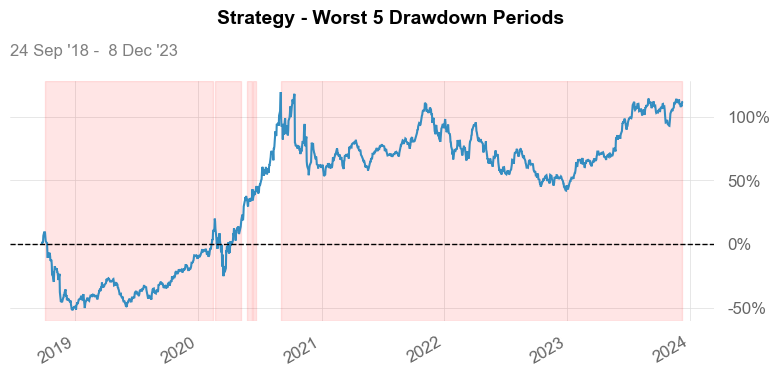

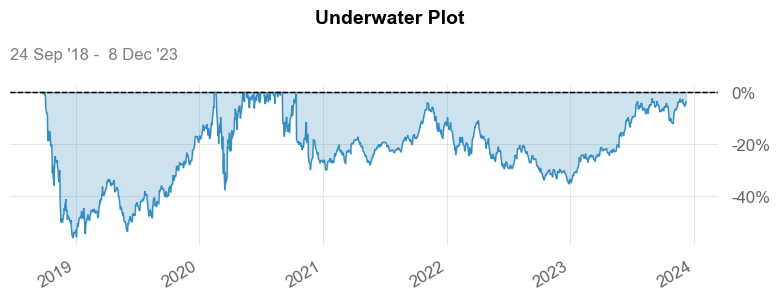

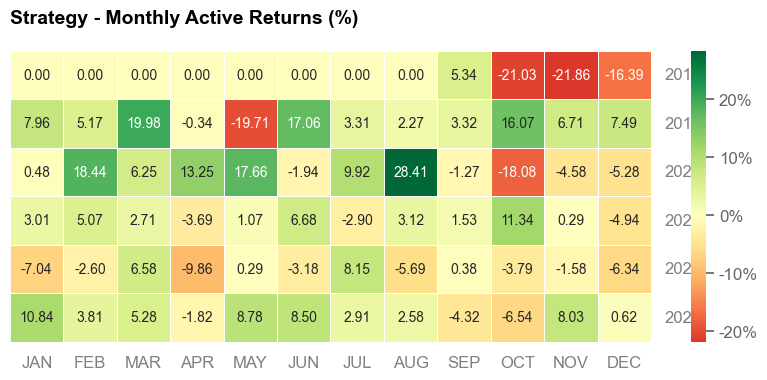

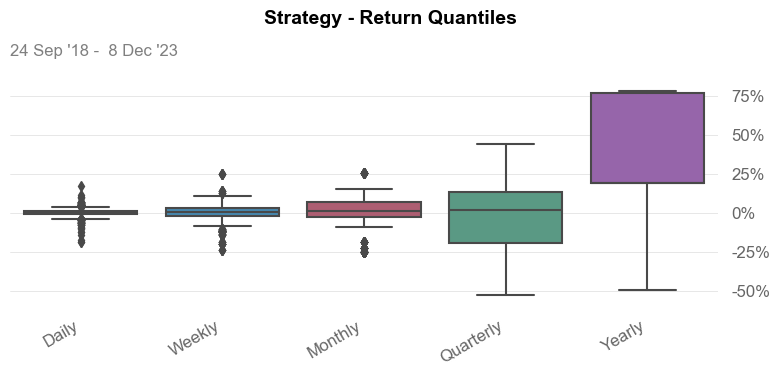

In [5]:
qs.reports.full(returns=daily_returns["portfolio"], 
                benchmark=daily_returns[benchmark_symbol])